In [1]:
#for data preprocessing
import pandas as pd
#For plotting
import matplotlib.pyplot as plt
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
import math
#for plotting
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [2]:
#read our dataset
df = pd.read_csv("data.csv")
#show first 5 examples
df.head()

,X
0,0.29617
1,1.20080
2,1.09020
3,-0.35870
4,-0.12993


In [3]:
# some desciption about our data
df.describe()

,X
count,1000.000000
mean,1.288275
std,1.612349
min,-2.861400
25%,0.031861
50%,1.245900
75%,2.529775
max,5.966300


In [4]:
data=df.X

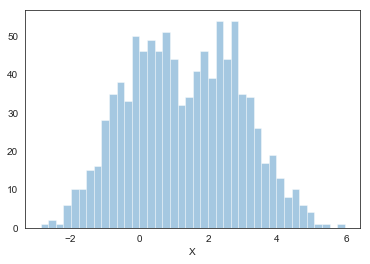

In [5]:
# ploting histogram of our data
sns.distplot(data, bins=40, kde=False)

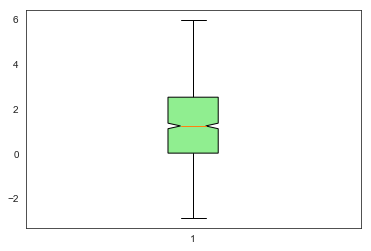

In [6]:
# ploting box chart of our data
bplot2 = plt.boxplot(data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color
bplot2['boxes'][0].set_facecolor('lightgreen')
plt.show()
print()

## EM Algorithm with Basic Math

### first step: Initial setting for the parameters (for two component)


#### list of parameters:
1,2 - mu for two Gaussian component

3,4 - sigma for two Gaussian component

5,6 - total probabilty of two Gaussian component


In [17]:
# this is an example for first step
mu1=0.5
mu2=0.7
sigma1=1
sigma2=1

In [18]:
# but we perfer initial p1 and p2 (5 and 6) by distance of each point to centroid of each Gaussian component
f=0
g=0
for i in data:
    f=f+abs(i-mu1)
    g=g+abs(i-mu2)
p2=f/(f+g)
p1=g/(f+g)

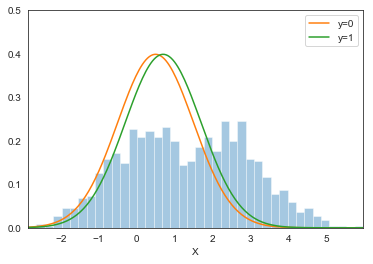

In [19]:
# ploting our component and histogram of data to compare with final value of these parameters
x = np.linspace(data.min(), data.max(), 200)
g_single = stats.norm(mu1, sigma1).pdf(x)
sns.distplot(data, bins=40, kde=False, norm_hist=True)
plt.plot(x, g_single, label='y=0')
g_single = stats.norm(mu2, sigma2).pdf(x)
plt.plot(x, g_single, label='y=1')
axes = plt.gca()
axes.set_xlim([data.min(),data.max()])
axes.set_ylim([0,0.5])
plt.legend();

### Secound Step(E-Step):
calculate probability of each point to assign to each component (for each x => p(component1|xi)) with bayesian rule(line of 9,10)

b=one of component(for example component 1)

a=another component



![alt text](https://jvtuka.dm.files.1drv.com/y4m4ZKbN9lmx7TYGuBFzD8vwJii-oSVXW0fcm9MZNRLa_DER1XaBSkx2_52jlsILehLDNU9m7wD9Ka47UDrt_Ou5oFlbjgGwMBkZLziLETO6YE88WfHHBl28wK8zbKzZNs0KCBuc3JAaQ1axU6aaGkMawa2usVomFY-qqzDPJ8vuxv-VzBgPsFFZxQYYH-1prut05pFhgUT5tHEsv8CZFwM7Q/E-step.bmp?psid=1 "Logo Title Text 1")

### Third Step(M-Step):
Estimate our parameters for each component with probability of each point in E-Step

M-Step(line 9-16)



![alt text](https://jftuka.dm.files.1drv.com/y4mGrDEClTN0YTtSRE25o-SMA6J3hKNbVnyizaa8WeJIyVYk_9KZ1Uc7K4Wq30-L5puEiezAeyiE9I5wYWZ5J67ChYM9mqI7Yi7W03o1w3ICOBbRmdqN8CsIiwQAVxgfD9Udc80rNd1aC2c3hQooBYFoJk0fHjr80tg-22__M7wUQN-a7GnI-vrMNtlYy9TP52PQVK3joFXmmCHXP2H7O281A/M-step.bmp?psid=1 "Logo Title Text 1")

### forth Step(last step):
we repeat E-step and M-step itertivly until we got enough coverage for total probability 

we check this(line 17-19) 

In [20]:
# normal distribution pdf function first line of image below:
def pdf(x,mu,sigma):
        u = (x - mu) / abs(sigma)
        y = (1 / (math.sqrt(2 * math.pi) * abs(sigma))) * math.exp(-u * u / 2)
        return y

In [28]:
def EMAlgorithm(data,mu1,mu2,sigma1,sigma2,p1,p2):
    p1old=2
    for i in range(1,100):
        p1x=[]
        p2x=[]
        for x in data:
            #E-Step
            p1x.append((p1*pdf(x,mu1,sigma1))/(p1*pdf(x,mu1,sigma1)+p2*pdf(x,mu2,sigma2)))
            p2x.append((p2*pdf(x,mu2,sigma2))/(p1*pdf(x,mu1,sigma1)+p2*pdf(x,mu2,sigma2)))
        #M-Step
        mu1=sum([a*b for a,b in zip(data,p1x)])/sum(p1x)
        mu2=sum([a*b for a,b in zip(data,p2x)])/sum(p2x)
        #sigma1=np.sqrt(sum([((a-mu1)**2)*b for a,b in zip(data,p1x)])/sum(p1x))
        #sigma2=np.sqrt(sum([((a-mu2)**2)*b for a,b in zip(data,p2x)])/sum(p2x))
        p1old=p1
        p1=sum(p1x)/data.shape[0]
        p2=sum(p2x)/data.shape[0]
        if abs(p1-p1old)<0.00001:
            print("number of iteration:  "+str(i))
            break;
    return mu1, mu2, sigma1, sigma2, p1, p2
    
mu1, mu2, sigma1, sigma2, p1, p2 = EMAlgorithm(data,mu1,mu2,sigma1,sigma2,p1,p2)
print("first Normal Distribution mu = ",mu1,"  and sigma = ",sigma1," and total probability = ",p1)
print("secound Normal Distribution mu = ",mu2,"  and sigma = ",sigma2," and total probability = ",p2)

number of iteration:  1
first Normal Distribution mu =  2.596498873701035   and sigma =  1  and total probability =  0.481469239596967
secound Normal Distribution mu =  0.07355577583311658   and sigma =  1  and total probability =  0.5185307604030323


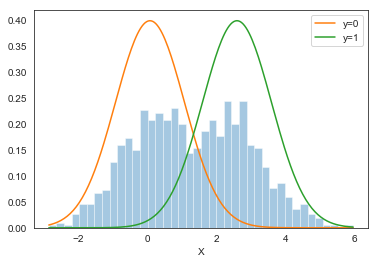

In [23]:
# ploting the final parrmeters
x = np.linspace(data.min(), data.max(), 200)
g_single = stats.norm(mu1, sigma1).pdf(x)
sns.distplot(data, bins=40, kde=False, norm_hist=True)
plt.plot(x, g_single, label='y=0')
g_single = stats.norm(mu2, sigma2).pdf(x)
plt.plot(x, g_single, label='y=1')
axes.set_xlim([data.min(),data.max()])
axes.set_ylim([0,0.5])
plt.legend();

# EM Algorithm with Sklearn library:

In [24]:
import sklearn
from sklearn.mixture import GaussianMixture #import GaussianMixture Methode for Em Algorithm
import sys

# Fitting using a GMM with a single component
clf = GaussianMixture(n_components=2) # prepare Methode for learning with 2-component
clf.fit(df) # all of four Step is in fit Methode
print(clf.n_iter_) # print number of iteration for compare with our model
print("first Normal Distribution mu = ",clf.means_[0][0],"  and sigma = ",clf.covariances_[0][0][0])
print("secound Normal Distribution mu = ",clf.means_[1][0],"  and sigma = ",clf.covariances_[1][0][0])

4
first Normal Distribution mu =  2.5649025292039016   and sigma =  1.0414337214543687
secound Normal Distribution mu =  0.0261424669877417   and sigma =  0.9307930806604531


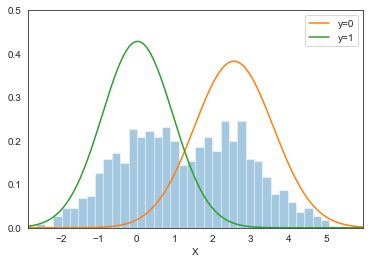

In [25]:
# ploting the final parrmeters of sklearn library
x = np.linspace(data.min(), data.max(), 200)
g_single = stats.norm(clf.means_[0][0], clf.covariances_[0][0][0]).pdf(x)
sns.distplot(data, bins=40, kde=False, norm_hist=True)
plt.plot(x, g_single, label='y=0')
g_single = stats.norm(clf.means_[1][0], clf.covariances_[1][0][0]).pdf(x)
plt.plot(x, g_single, label='y=1')
axes = plt.gca()
axes.set_xlim([data.min(),data.max()])
axes.set_ylim([0,0.5])
plt.legend();

#### compare of our model and Sklearn library

In [26]:

print("diffrence between sklearn & our algorithm for 1st: mu = ",abs(clf.means_[0][0]-mu1),"  and sigma = ",abs(clf.covariances_[0][0][0]-sigma1))
print("diffrence between sklearn & our algorithm for 2nd: mu = ",abs(clf.means_[1][0]-mu2),"  and sigma = ",abs(clf.covariances_[1][0][0]-sigma2))

diffrence between sklearn & our algorithm for 1st: mu =  2.4914798641523848   and sigma =  0.041433721454368744
diffrence between sklearn & our algorithm for 2nd: mu =  2.570215583679822   and sigma =  0.06920691933954692


# calculating maximum liklihood for different mu

number of iteration:  33
number of iteration:  33
number of iteration:  33
number of iteration:  33
number of iteration:  33
number of iteration:  34
number of iteration:  33
number of iteration:  33
number of iteration:  33
number of iteration:  33
number of iteration:  32
number of iteration:  30
number of iteration:  1
number of iteration:  30
number of iteration:  32
number of iteration:  33
number of iteration:  33
number of iteration:  33
number of iteration:  33
number of iteration:  34
number of iteration:  33


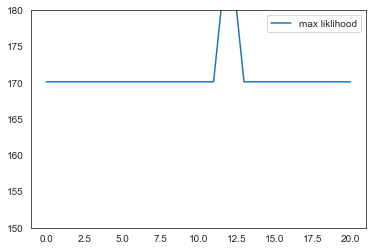

In [35]:
steps=[x * 0.25-1 for x in range(0, 21)]
maxlike=[]
for i in steps:
    mu1, mu2, sigma1, sigma2, p1, p2 = EMAlgorithm(data,i,4-i,sigma1,sigma2,0.5,0.5)
    liklihood=0
    for x in data:
        liklihood+=p1*pdf(x,mu1,sigma1)+p2*pdf(x,mu2,sigma2)
    maxlike.append(liklihood)
plt.plot(maxlike,label='max liklihood')
axes = plt.gca()
axes.set_ylim([150,180])
plt.legend()